# Introduction to Data Science
## Homework 5

Student Name: Yueqiu Sun 

Student Netid: ys3202
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

The Laplace smothing is especially useful when there are only a few instances of $e_i$. The technique is used to moderate the influence of $e_i$ with less instances which have less evidence than the other $e_j$ with more instances. The bias is increased due to the smoothing and the estimator with the Laplace smoothing is biased because the expected value of the estimator is different from the true value. However, the varaince is decreased bcacuse events that is moderated is more likely to have extremre values. Imagine using the spam classifer to classify two emails. First email has been strongly classisifed to be spam. Second email is only word different from the first email. However, this difference leads to $P(e_i|c)$ to be 0 because that word is not included in the spam dictionary. The second email is therefore classified to be non-spam. This reasoning is clearly problematic. Using Laplace smoothing can solve this kind of problem.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [7]:
import pandas as pd
data = pd.read_csv('/Users/hp/Desktop/IDS/HW5/imdb.csv')
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [30]:
data['Class'].replace('P', 1,inplace=True)
data['Class'].replace('N', 0,inplace=True)
data.dropna(inplace=True)

In [31]:
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [32]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#?CountVectorizer

binary_count_vectorizer = CountVectorizer(stop_words= 'english', binary = True, ngram_range={1,2})
binary_count_vectorizer.fit(X_train)

binary_tfidf_vectorizer = TfidfVectorizer(stop_words= 'english', binary = True, ngram_range={1,2})
binary_tfidf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range={1, 2}, norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [34]:
print(list(binary_count_vectorizer.vocabulary_.keys())[:10])
print(list(binary_tfidf_vectorizer.vocabulary_.keys())[:10])

['film hats', 'doesnt suddenly', 'successful past', 'dubbed french', 'connely', 'enjoy boooooo', 'kargil', 'cut allows', 'fact depiction', 'funny tv']
['film hats', 'doesnt suddenly', 'successful past', 'dubbed french', 'connely', 'enjoy boooooo', 'kargil', 'cut allows', 'fact depiction', 'funny tv']


In [35]:
X_train_binary_count = binary_count_vectorizer.transform(X_train)
X_train_binary_tfidf = binary_tfidf_vectorizer.transform(X_train)
X_test_binary_count = binary_count_vectorizer.transform(X_test)
X_test_binary_tfidf = binary_tfidf_vectorizer.transform(X_test)

In [36]:
X_train_binary_count[:20,:20].todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [37]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

LR_count = LogisticRegression()
LR_tfidf = LogisticRegression()
NB_count = BernoulliNB()
NB_tfidf = BernoulliNB()
LR_count.fit(X_train_binary_count, Y_train)
LR_tfidf.fit(X_train_binary_tfidf, Y_train)
NB_count.fit(X_train_binary_count, Y_train)
NB_tfidf.fit(X_train_binary_tfidf, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
fprs=[] 
tprs=[]
roc_labels=[]

fpr, tpr, thresholds = metrics.roc_curve(Y_test, LR_count.predict_proba(X_test_binary_count)[:,1])
fprs.append(fpr) 
tprs.append(tpr) 
roc_labels.append('LR_count, AUC=%.3f'% metrics.roc_auc_score(Y_test, LR_count.predict_proba(X_test_binary_count)[:,1])) 

fpr, tpr, thresholds = metrics.roc_curve(Y_test, NB_count.predict_proba(X_test_binary_count)[:,1])
fprs.append(fpr) 
tprs.append(tpr) 
roc_labels.append('NB_count, AUC=%.3f'% metrics.roc_auc_score(Y_test, NB_count.predict_proba(X_test_binary_count)[:,1])) 

fpr, tpr, thresholds = metrics.roc_curve(Y_test, LR_tfidf.predict_proba(X_test_binary_tfidf)[:,1])
fprs.append(fpr) 
tprs.append(tpr) 
roc_labels.append('LR_tfidf, AUC=%.3f'% metrics.roc_auc_score(Y_test, LR_tfidf.predict_proba(X_test_binary_tfidf)[:,1]))  

fpr, tpr, thresholds = metrics.roc_curve(Y_test, NB_tfidf.predict_proba(X_test_binary_tfidf)[:,1])
fprs.append(fpr) 
tprs.append(tpr) 
roc_labels.append('NB_tfidf, AUC=%.3f'% metrics.roc_auc_score(Y_test, NB_tfidf.predict_proba(X_test_binary_tfidf)[:,1]))  

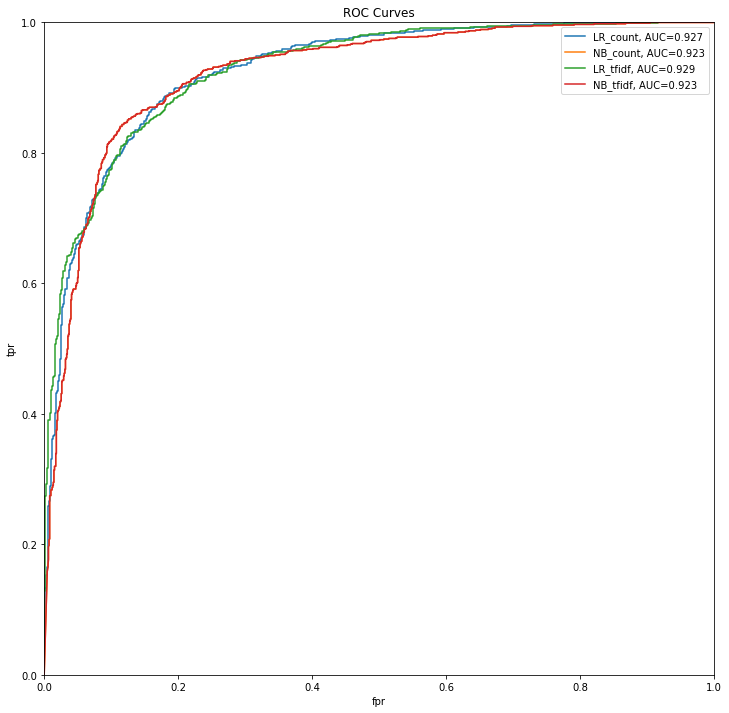

In [40]:
for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
    plt.plot(fpr, tpr, label=roc_label)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


The logistic regression using TfidfVectorizer() does a better job and it has the highest AUC among the four models. The reason could be that the assumption of Naive Bayers does not hold. Naive Bayers assumes the occurances of the words and bigrams are independent given the class. However, they are not actually independent. It is common sense that a lot of world and bigrams tend to occur together. Logistic Regression does not rely on the above assumption. Therefore logistics regression outpeforms Naive Bayers.

Naive Bayers using TfidfVectorizer() and Naive Bayers using CountVectorizer() perform identically. 
The denominator of Naive Bayers is $p(E)$, that is the joint probability of the occurance of the events(words or bigrams in this case), which means that the Naive Bayers classfier have already taken account of the rareness of the words or bigrams in the corpus which is what IDF try to measure. And term frequency and count is the same in this case since they are both binary. Therefore it is no suprise that Naive Bayers using TfidfVectorizer() and Naive Bayers using CountVectorizer() perform identically. 

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [88]:
Y_test[(Y_test-LR_tfidf.predict(X_test_binary_tfidf))==1].index

Int64Index([5866, 3782, 8394, 6240, 5021,  264, 6276,  628, 6491, 3718,
            ...
            7425, 4844, 7067, 6389, 4695, 2923, 7738, 1983, 3525, 6355],
           dtype='int64', length=171)

In [92]:
X[4695] 

"'Weak start solid middle fantastic finish. Thats my impression of this film anyway. I liked Simon Pegg in the two films Ive seen him in--- Hot Fuzz and Shaun of the Dead. His role here though took a completely different turn. Shows his range as an actor but nonetheless I really disliked th character as he was portrayed at the beginning. Theres a kind of humour I call frustration comedy. Its supposed jokes and wit are really nothing more than painful and awkward moments. Much like the Bean character Rowan Atkinmson plays. There are a number of other comedic actors who portray similar characters too. I dont mean to bash them here so will not. But do be warned that if you are like me and you dislike smarmy and maddeningly bungling idiots Pegg shows just such characteristics for the first third of this film. It DOES get better however. I read somewhere that this is based on a true story. Hmmm. Maybe. The films story stopped being annoying and became kind of a triumph of the little guy in 

In [91]:
X[7738]

"'this movie probably had a $750 budget and still managed to surpass Titanic. i rented this the day i crashed my moms car and it was the only thing that cheered me up beyond belief! it has to be tied with The Assult of the Killer Bimbos. Things to look for are: 1. The drive in blow job chinese girl scene 2. The bleach blonde in the sassoon shirt who never changes 3. The Flinstone-like screech out driving 4. The clashing ensemble worn by the redhead right before she gets killed (dont worry im not ruining any surprises for its soooo predictable) 5. The guy who finds it necessary to howl. 6. The mental patient who plays a convincing job of being insane by poking out the eyes of a maniquen. 7. The hour long chase at the end involving the teacher and the priest. 8. the womman writing grafitti on the bathroom wall. 9. last but not least the wonderful special effects--especially the stab in the boob that made a... heaven help me... popping noise. enjoy! '"

In [95]:
X[628]

"'I almost didnt rent this because of all the bad comments but did anyways.I thought it was similar to darkness falls which i also liked. The only part i hated about the tooth ferry was the 2 red neck brothers at the gas station.They were funny and the dialog made me laugh but this was not a comedy. It ruined the movie a bit for me because it was unnecessary.The rest of the movie was the way a horror or suspense film should be. The make-up was good and I have seen way worse movies then this one. It was a simple story with believable acting.Its not the scariest or goriest movie but I wasnt ticked off or wanting a refund after watching it. On the DVD there was previews of other movies that all look good and im gonna check them out.'"

In [94]:
X[3525]

"'The world is made up two different types of moviegoers... There are the English Patient types who cant be bothered to enjoy anything that isnt high-brow enough to be shown on PBS and there are the Happy Gilmore types for whom an hour and a half of genitalia puns are definitely worth the $7. Certainly theres a ton of gray area but you know to which side youre leaning. If youre an English Patient person save your time save your money and save us all your Oh this movie is so childish and stupid comments. I know you thoroughly enjoy belittling every movie you dont like and every person that likes them but maybe you could hold off just this once. But if youre a Happy Gilmore type... go see this one... Youll find it hilarious. Tim Meadows has created a hilarious character and Will Farrell continues to be hilarious in just about everything he does. Go check it out. Youll be glad you did. And thats OK.'"

In [93]:
X[3718]

"'Despite its rather salacious title this is a light teen dramedy. Unless youre an old coot youll probably find it likeable. It isnt so good on developing characters or situations smoothly though. When you view it you get the feeling that youve been running back and forth to the kitchen even if youve been sitting down watching the whole time. This is one of those films that counts a great deal on your liking the characters and they are appealing enough. Jennifer Connelly is the heartthrob of many I know but Ive always liked the more obscure Maddie Corman. The teens get most of the screen time without a lot of intrusions from those pesky grown-ups. Is it just me or did most of the young males look an awful lot alike?'"

The four exmples contain words like "dislike", "painful", "awkward", "hated", "awful". Those words don't necessarily mean negative feelings given the context, but they give negaive score to the classifier and led to the misclassification.